<a href="https://colab.research.google.com/github/DianaMutekhele/DEEP-LEARNING/blob/main/Copy_of_Computer_Vision_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 23 kB/s 
     |████████████████████████████████| 37.1 MB 49 kB/s 


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os

In [ ]:
# import afsis dataset
from google.colab import drive 
drive.mount('/content/gdrive') # map to google drive



Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/computer vision') # change directory

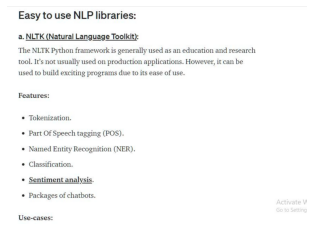

In [ ]:
img = cv2.imread('image1.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

#Remove the axis
plt.axis('off')
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(gray)
result

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[27, 7], [375, 7], [375, 47], [27, 47]],
  'Easy to use NLP libraries:',
  0.9833095473816387),
 ([[30, 74], [380, 74], [380, 102], [30, 102]],
  'a. NLTK (WNatural Language Toolkit):',
  0.45652786378495813),
 ([[28, 114], [714, 114], [714, 142], [28, 142]],
  'The NLTK Python framework is generally used as an education and research',
  0.9138702834480881),
 ([[28, 142], [680, 142], [680, 175], [28, 175]],
  'tool. Its not usually used on production applications However; it can be',
  0.7592632581964402),
 ([[28, 178], [152, 178], [152, 202], [28, 202]],
  'used to build',
  0.9664090175364661),
 ([[226, 178], [512, 178], [512, 208], [226, 208]],
  'programs due to its ease of use.',
  0.6058457853482153),
 ([[30, 244], [124, 244], [124, 268], [30, 268]],
  'Features:',
  0.9454425590916026),
 ([[60, 308], [188, 308], [188, 332], [60, 332]],
  'Tokenization:',
  0.8708916232093872),
 ([[58, 349], [332, 349], [332, 380], [58, 380]],
  'Part Of Speech tagging (POS)_',
  0.74979423045

In [ ]:
res = []
for i in range(len(result)):
  print(result[i][1])
  res.append(result[i][1])

Easy to use NLP libraries:
a. NLTK (WNatural Language Toolkit):
The NLTK Python framework is generally used as an education and research
tool. Its not usually used on production applications However; it can be
used to build
programs due to its ease of use.
Features:
Tokenization:
Part Of Speech tagging (POS)_
Named
Recognition (NER).
Classification_
Sentiment analysis:
Packages of chatbots
Activate
Go to Setting
Use-cases:
exciting
Entity


In [ ]:
res

['Easy to use NLP libraries:',
 'a. NLTK (WNatural Language Toolkit):',
 'The NLTK Python framework is generally used as an education and research',
 'tool. Its not usually used on production applications However; it can be',
 'used to build',
 'programs due to its ease of use.',
 'Features:',
 'Tokenization:',
 'Part Of Speech tagging (POS)_',
 'Named',
 'Recognition (NER).',
 'Classification_',
 'Sentiment analysis:',
 'Packages of chatbots',
 'Activate',
 'Go to Setting',
 'Use-cases:',
 'exciting',
 'Entity']

## Using the Text Recognition model to identify vehicle number plates
1. We will read in the cars images using the opencv library.
2. We will edit the images into the correct format before feeding it to the model.
3. We will use the ocr package to detect the number plate.
4. We will add our number plate to the car and save the output

### 1. Read in Image, Grayscale and Blur

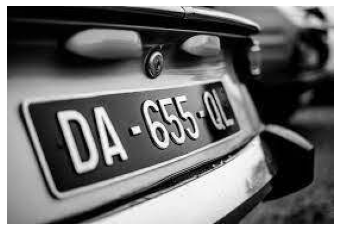

In [ ]:
img = cv2.imread('car1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

#Remove the axis
plt.axis('off')
plt.show()

### 2. Apply filter and find edges for localization

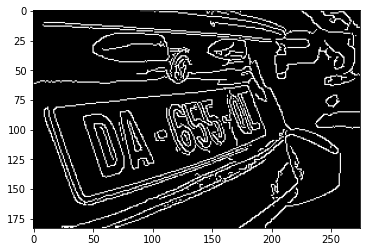

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))



### 3. Find Contours and Apply Mask

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[181,  65]],

       [[194, 105]],

       [[ 41, 153]],

       [[ 20,  81]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

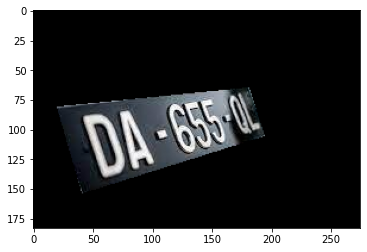

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

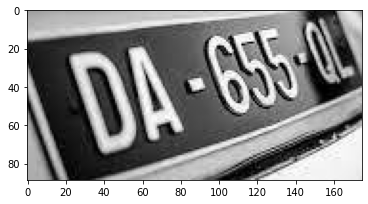

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### 4. Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[20, 4], [152, 4], [152, 82], [20, 82]], 'DA-655 E', 0.2257473490751132)]

### 5. Render Result

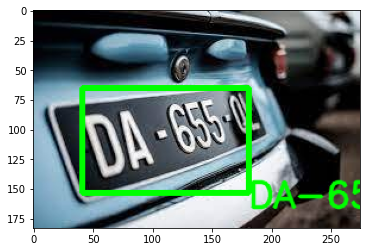

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

See also [this example](https://github.com/nicknochnack/RealTimeAutomaticNumberPlateRecognition/blob/main/Automatic%20Number%20Plate%20Detection.ipynb) on how to combine easyocr and tensorflow for a more powerful number plate detection.